# Talon Lusk

## Exploratory Data Analysis
For my research, I wanted to analyze how the choice of Film Type and the Format Shot on correlate to the budget of a Film and the choice of Genre. I plan to evaluate how these variables affect eachother independently in multiple comparisons. With the use of the Format Shot on, there are multiple Codecs and Film Sizes that could negatively/positively impact how the Movie is filmed. Some Digital Codecs might be cheaper to shoot with since they could take up less space than others. Further more, the quality of Codec could matter a lot when it comes to shooting a Drama Movie versus a fast paced Horror Movie. There is also the lingering question of the viability and efficiency of shooting on Film nowadays. Researching how the choice of Format and the Film Type correlate with different factors (Genre, Budget) can provide a great insight into Movie Production.

### Importing Data

In [1]:
from project_functions1 import *
df = pd.read_csv("../data/raw/top_directors.csv")
df_clean = load_and_process("../data/raw/top_directors.csv")

In [2]:
df1 = (
pd.read_csv("../data/raw/top_directors.csv")
        .rename(columns={"production_year": "year"})
        .merge(pd.read_csv("../data/raw/top_movies.csv"), on=['id'], how="left", suffixes=('', '_y'))
        .loc[:, ["director", "negative_format", "year", "budget", "genres", "negative_format"]]
)

### Reviewing Initial Data
From the initial data set I grabbed, there were a lot of unneeded columns that were taking up space. Simple things like Director ID's and ID's of Movies were of no value when it came to starting to plot my data. As well I removed the genres and Co-Directors since I wanted to minimize the amount of clutter in the Data Frame.

In [3]:
print(df.shape)
print(df.describe().apply(lambda s: s.apply(lambda x: format(x,'f'))))
print(df.columns)
df.head()

(3635, 11)
      production_year              id     director_id
count     3635.000000     3635.000000     3635.000000
mean      2011.508941  3949564.899587  1632997.890784
std          3.453618   413893.060250  1081841.048771
min       2006.000000  3211460.000000     1975.000000
25%       2009.000000  3601965.000000   780406.000000
50%       2011.000000  3976222.000000  1504152.000000
75%       2014.000000  4338652.000000  2276982.500000
max       2017.000000  4610267.000000  5400585.000000
Index(['production_year', 'id', 'title', 'director', 'director_id',
       'co_directors', 'co_directors_id', 'genres', 'cameras',
       'negative_format', 'film_type'],
      dtype='object')


,production_year,id,title,director,director_id,co_directors,co_directors_id,genres,cameras,negative_format,film_type
0,2009,4105528,Planet 51,"Abad, Javier",1975,"Abad, Javier|Blanco, Jorge|Martínez, Marcos",1516774|1975|233690,Adventure|Animation|Comedy|Family|Sci-Fi,NaN,Digital,D
1,2006,3973646,Mission: Impossible III,"Abrams, J.J.",7718,"Abrams, J.J.",7718,Action|Adventure|Thriller,"Arriflex 235, Panavision C-Series Lenses|Arrif...",35 mm|Video,D|F
2,2009,4272468,Star Trek,"Abrams, J.J.",7718,"Abrams, J.J.",7718,Action|Adventure|Sci-Fi,"Arriflex 435 ES, Panavision Primo Lenses|Panav...",35 mm,F
3,2011,4291293,Super 8,"Abrams, J.J.",7718,"Abrams, J.J.",7718,Mystery|Sci-Fi|Thriller,"Arriflex 16 SR3, Zeiss Super Speed Lenses|Arri...",16 mm|35 mm|8 mm|Redcode RAW,D|F
4,2013,4272595,Star Trek: Into Darkness,"Abrams, J.J.",7718,"Abrams, J.J.",7718,Action|Adventure|Sci-Fi,"Arriflex 435 ES, Panavision Primo, C-, E-Serie...",35 mm|65 mm|Redcode RAW,D|F


### Clean Data
After reviewing what I could do with Method Chaining, I had decided to keep the [Year, Director, Format], showing which Format the movie was shot on. That brought it down from 11 columns to a number of 3. The rows had increased in size as I needed to split up multiple formats that were in the same cell. To do that I created a new row and put them below to seperate them. Afterwards I removed any NaN rows that were in the Format column and made sure there were no duplicate rows that contained the same data. Lastly I made sure to sort the rows so they were in order of Year.

In [4]:
print(df_clean.shape)
print(df_clean.describe().apply(lambda s: s.apply(lambda x: format(x,'f'))))
print(df_clean.columns)
df_clean.head()
df_clean.negative_format.unique()

(4199, 6)
              year            budget
count  4199.000000       4199.000000
mean   2011.185282   69310509.645154
std       3.370197   61009692.143525
min    2006.000000          0.000000
25%    2008.000000   25000000.000000
50%    2011.000000   50000000.000000
75%    2014.000000   95000000.000000
max    2017.000000  378500000.000000
Index(['director', 'negative_format', 'year', 'budget', 'genres', 'film_type'], dtype='object')


array([nan, 'SRMemory', '35 mm', 'AXSM', 'Video', 'Codex', 'SxS Pro',
       'Digital', 'Codex ARRIRAW', 'Uncompressed Digital', 'Super 16',
       '16 mm', 'Redcode RAW', 'Gemini 4', '65 mm', 'CineForm RAW',
       'ARRIRAW', 'HDCAM', 'Super 8mm', 'DVCPRO Full 4', '8 mm',
       'Gemini444', 'CF', 'IMAX Digital 3-D', 'HD', 'S.two OB-1',
       'Super 8'], dtype=object)

/var/folders/sz/bp4p48sn3zv3w4_99y84m0j80000gn/T/ipykernel_45234/1134004300.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_clean.corr()# plot the heatmap


<AxesSubplot: >

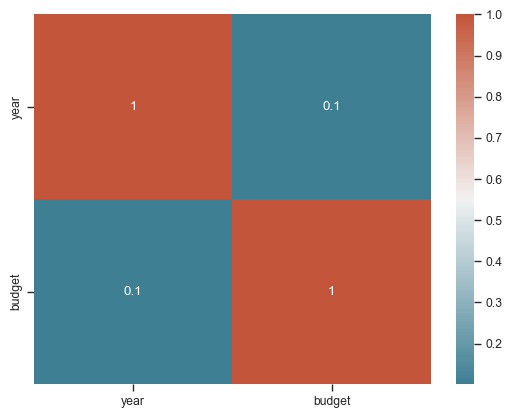

In [5]:
sns.countplot(df_clean, x="negative_format")
df_clean

# calculate correlation matrix
corr = df_clean.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot: xlabel='negative_format', ylabel='budget'>

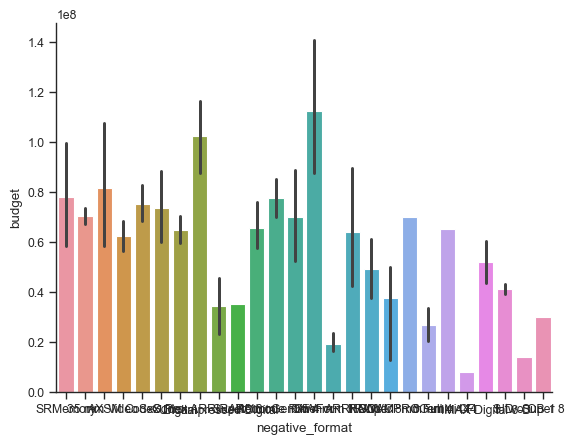

In [6]:
sns.barplot(df_clean, x="negative_format", y="budget")

<AxesSubplot: xlabel='film_type', ylabel='count'>

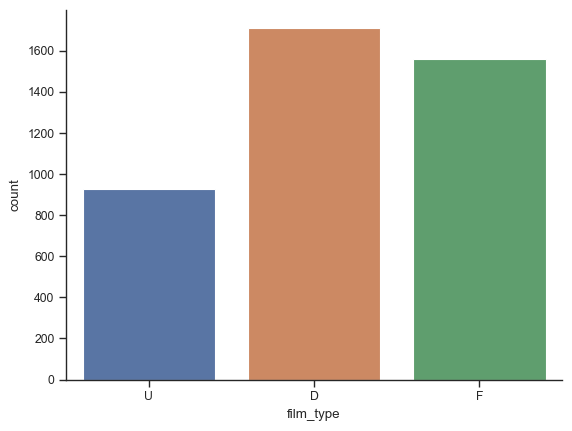

In [7]:
sns.countplot(df_clean, x="film_type")

<AxesSubplot: xlabel='negative_format', ylabel='count'>

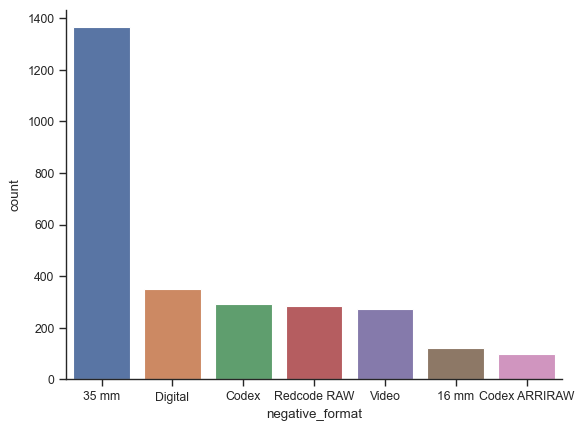

In [8]:
df_p = get_popular_formats(df_clean) # Calling Function to Filter Overplotted Data
sns.barplot(df_p, x="negative_format", y="count")

Using Method Chaining I made a seperate dateframe to filter out some lesser used formats.
Doing this allowed me to filter out Formats with less than 80 Movies to prevent overplotting graphs.
Although we saw above that Digital was used more than Film, it doesn't seem to line up initially with this graph. This is because there are a large variety of Digital Formats (Codecs) to shoot on versus the fewer sizes of Film (35mm, 65mm, 16mm, etc). So overall it seems that out of Format Type, 35mm is the most prevalent nowadays with Film Size.

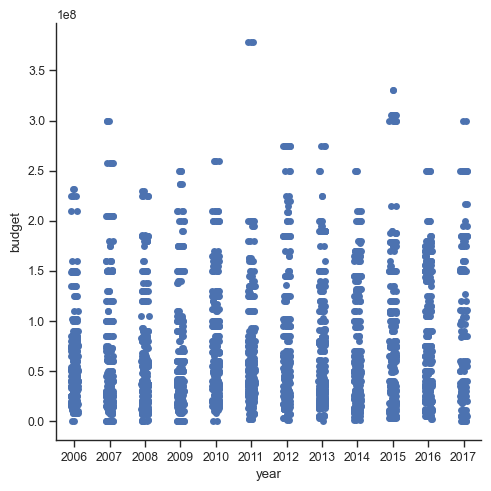

In [9]:
sns.catplot(df_clean, x="year", y="budget")

<AxesSubplot: xlabel='year', ylabel='count'>

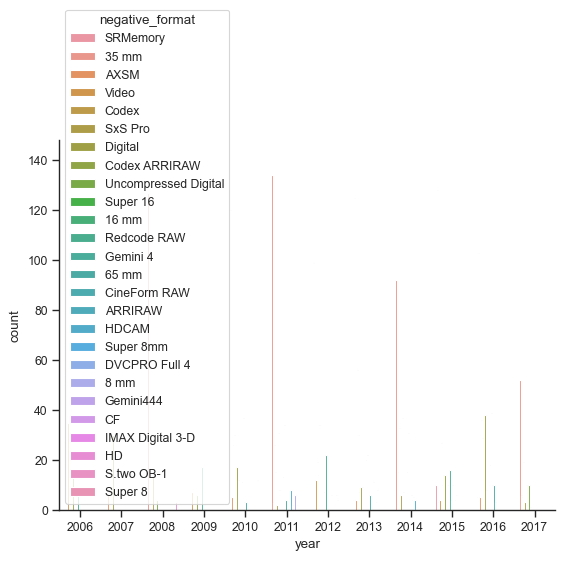

In [10]:
sns.countplot(df_clean, x="year", hue="negative_format")

In [11]:
df_clean.to_csv('../data/processed/talon.csv')